## **CIND820 Capstone Project**

# **Integrating Predictive Analytics and Anomaly Detection for Cyanobacterial Bloom Forecasting**


###*This notebook details the development of predictive analytics for cyanobacterial blooms using ARIMA, LSTM, and anomaly detection models. It includes data preparation, exploratory analysis, and initial modeling insights.*

In [1]:
# Mount Google Drive to permit colab Notebook access to project datasets

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1. Data Collection and Preprocessing**


## **1.1 Import Necessary Libraries**

Import libraries that will be required for data analysis, visualization, and handling.

In [2]:
# Import necessary libraries for data manipulation and visualization.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## **1.2 Source Identification and Data Acquisition**

Define the file paths to the datasets that will be used in the analysis and in assessing the project research questions.

In [3]:
# Specify file paths for the datasets

bloom_indices_path = '/content/drive/MyDrive/CIND820/LakeErie_Daily_BloomIndices.csv'
water_quality_path = '/content/drive/MyDrive/CIND820/lake_erie_habs_field_sampling_results_2012_2018.csv'


## **1.3 Load Datasets**

Read the Bloom Indices and Water Quality datasets into pandas DataFrames for manipulation.

In [4]:
# Load the Bloom Indices dataset
bloom_data = pd.read_csv(bloom_indices_path, encoding='ISO-8859-1')

# Load the Water Quality dataset
water_quality_data = pd.read_csv(water_quality_path, encoding='ISO-8859-1')


## **1.4 Data Inspection**

Get a preliminary understanding of the data structure and content.

In [5]:
# Inspect the first few rows of the Bloom Indices dataset
print("Bloom Data Sample:")
print(bloom_data.head())

# Print a line of underscores to demarcate the outputs
print("_ " * 70)

# Inspect the first few rows of the Water Quality dataset
print("\nWater Quality Data Sample:")
print(water_quality_data.head())


Bloom Data Sample:
         Date       Lake Satellite Sensor  Bloom Extent (KM2)  \
0  2002-06-02  Lake Erie            MERIS               25.83   
1  2002-06-15  Lake Erie            MERIS               25.83   
2  2002-06-18  Lake Erie            MERIS                0.27   
3  2002-06-23  Lake Erie            MERIS              119.97   
4  2002-06-24  Lake Erie            MERIS              126.81   

   Bloom Extent (% of Lake Area)  Bloom Intensity (µg/L)  \
0                           0.10                   15.74   
1                           0.10                   15.74   
2                           0.00                   11.69   
3                           0.45                   37.43   
4                           0.48                   27.84   

   Bloom Severity (µg/L km2)  Valid Pixels\n (% of Lake Area)  
0                     406.52                            28.71  
1                     406.52                            28.71  
2                       3.16         

## **1.5 Data Cleaning and Preparation**

### **1.5.1 Parsing Dates**

Convert date columns to datetime objects for time-series analysis.

2. Convert bloom_data Dates to Match water_quality_data
Use the pd.to_datetime function to parse bloom_data dates into yyyy-mm-dd:

In [6]:
# Inspect the current date formats and data types
print("Initial Date Format and Data Type:")
print(bloom_data['Date'].head())
print(water_quality_data['Date'].head())

print("\nData Types:")
print(f"Bloom Data Date Type: {bloom_data['Date'].dtype}")
print(f"Water Quality Data Date Type: {water_quality_data['Date'].dtype}")

# Convert Date columns to datetime
bloom_data['Date'] = pd.to_datetime(bloom_data['Date'], format='%Y-%m-%d', errors='coerce')
water_quality_data['Date'] = pd.to_datetime(water_quality_data['Date'], format='%m/%d/%Y', errors='coerce')

# Check for invalid dates (after conversion)
print("\nPost Conversion - Check for Null Dates:")
print(bloom_data['Date'].isnull().sum())
print(water_quality_data['Date'].isnull().sum())

# Verify the new data types
print("\nPost Conversion - Data Types:")
print(f"Bloom Data Date Type: {bloom_data['Date'].dtype}")
print(f"Water Quality Data Date Type: {water_quality_data['Date'].dtype}")

# Preview the converted dates
print("\nConverted Date Formats:")
print(bloom_data['Date'].head())
print(water_quality_data['Date'].head())


Initial Date Format and Data Type:
0    2002-06-02
1    2002-06-15
2    2002-06-18
3    2002-06-23
4    2002-06-24
Name: Date, dtype: object
0    5/15/2012
1    5/15/2012
2    5/15/2012
3    5/15/2012
4    5/31/2012
Name: Date, dtype: object

Data Types:
Bloom Data Date Type: object
Water Quality Data Date Type: object

Post Conversion - Check for Null Dates:
0
0

Post Conversion - Data Types:
Bloom Data Date Type: datetime64[ns]
Water Quality Data Date Type: datetime64[ns]

Converted Date Formats:
0   2002-06-02
1   2002-06-15
2   2002-06-18
3   2002-06-23
4   2002-06-24
Name: Date, dtype: datetime64[ns]
0   2012-05-15
1   2012-05-15
2   2012-05-15
3   2012-05-15
4   2012-05-31
Name: Date, dtype: datetime64[ns]


### **1.5.2 Handling Column Names**

Ensure consistency in column names for easier data manipulation.
Standardize Column Names Normalize column names by stripping whitespace and other hidden characters.



2. Standardize Column Names
Normalize column names by stripping whitespace and other hidden characters:

In [7]:
bloom_data.columns = bloom_data.columns.str.strip().str.replace('\n', '').str.replace('\r', '').str.replace('  ', ' ')
water_quality_data.columns = water_quality_data.columns.str.strip().str.replace('\n', '').str.replace('\r', '').str.replace('  ', ' ')

print("Normalized column names in bloom_data:", bloom_data.columns.tolist())
print("Normalized column names in water_quality_data:", water_quality_data.columns.tolist())


Normalized column names in bloom_data: ['Date', 'Lake', 'Satellite Sensor', 'Bloom Extent (KM2)', 'Bloom Extent (% of Lake Area)', 'Bloom Intensity (µg/L)', 'Bloom Severity (µg/L km2)', 'Valid Pixels (% of Lake Area)']
Normalized column names in water_quality_data: ['Date', 'Site', 'Station Depth (m)', 'Sample Depth (m)', 'Sample Depth (category)', 'Local Time (Eastern Time Zone)', 'Latitude (decimal deg)', 'Longitude (decimal deg)', 'Wind speed (knots)', 'Wave Height (ft)', 'Sky', 'Secchi Depth (m)', 'Sample Temperature (°C)', 'CTD Temperature (°C)', 'CTD Specific Conductivity (µS/cm)', 'CTD Beam Attenuation (m-1)', 'CTD Tramission (%)', 'CTD Dissolved Oxygen (mg/L)', 'CTD Photosynthetically Active Radiation (µE/m2/s)', 'Turbidity (NTU)', 'Particulate Microcystin (µg/L)', 'Dissolved Microcystin (µg/L)', 'Extracted Phycocyanin (µg/L)', 'Chlorophyll_a', 'Total Phosphorus (µg P/L)', 'Total Dissolved Phosphorus (µg P/L)', 'Soluble Reactive Phosphorus (µg P/L)', 'Ammonia (µg N/L)', 'Nitrat

### **1.5.3 Handling Missing Values**

Address missing data to prevent errors in analysis.

In [8]:
# Check for missing values in Bloom Data
print("\nMissing values in Bloom Data:")
print(bloom_data.isnull().sum())



Missing values in Bloom Data:
Date                             0
Lake                             0
Satellite Sensor                 0
Bloom Extent (KM2)               0
Bloom Extent (% of Lake Area)    0
Bloom Intensity (µg/L)           0
Bloom Severity (µg/L km2)        0
Valid Pixels (% of Lake Area)    0
dtype: int64


In [9]:
# Check for missing values in Water Quality Data
print("\nMissing values in Water Quality Data:")
print(water_quality_data.isnull().sum())



Missing values in Water Quality Data:
Date                                                               0
Site                                                               0
Station Depth (m)                                                371
Sample Depth (m)                                                  17
Sample Depth (category)                                            0
Local Time (Eastern Time Zone)                                   363
Latitude (decimal deg)                                           376
Longitude (decimal deg)                                          376
Wind speed (knots)                                               650
Wave Height (ft)                                                 655
Sky                                                              366
Secchi Depth (m)                                                 405
Sample Temperature (°C)                                         1188
CTD Temperature (°C)                                            

In [ ]:
# Handle missing values in Water Quality Data
# For numeric columns, we can fill missing values with mean or median if appropriate
numeric_columns = water_quality_data.select_dtypes(include=[np.number]).columns.tolist()
water_quality_data[numeric_columns] = water_quality_data[numeric_columns].fillna(method='ffill')


## **1.6 Data Integration**

### **1.6.1 Aligning Datasets Temporally**

Combine datasets based on the date to facilitate joint analysis.

Final Check
Rerun the merge operation after ensuring the Date columns are correctly formatted and aligned:

In [10]:
# Merge datasets on 'Date'
merged_data = pd.merge(bloom_data, water_quality_data, on='Date', how='inner')


In [11]:
merged_data = pd.merge(bloom_data, water_quality_data, on='Date', how='inner')
print(merged_data.head())


        Date       Lake Satellite Sensor  Bloom Extent (KM2)  \
0 2016-06-13  Lake Erie          OLCI-S3              136.08   
1 2016-06-13  Lake Erie          OLCI-S3              136.08   
2 2016-06-13  Lake Erie          OLCI-S3              136.08   
3 2016-06-13  Lake Erie          OLCI-S3              136.08   
4 2016-06-13  Lake Erie          OLCI-S3              136.08   

   Bloom Extent (% of Lake Area)  Bloom Intensity (µg/L)  \
0                           0.51                   49.26   
1                           0.51                   49.26   
2                           0.51                   49.26   
3                           0.51                   49.26   
4                           0.51                   49.26   

   Bloom Severity (µg/L km2)  Valid Pixels (% of Lake Area) Site  \
0                    6703.63                          99.94  WE2   
1                    6703.63                          99.94  WE2   
2                    6703.63                      

In [12]:
# Having already created the `merged_data`...

# Convert the merged data to a DataFrame
merged_df = pd.DataFrame(merged_data)

# Display the entire DataFrame in a scrollable table using Pandas
from IPython.display import display

# Display the DataFrame
display(merged_df)


,Date,Lake,Satellite Sensor,Bloom Extent (KM2),Bloom Extent (% of Lake Area),Bloom Intensity (µg/L),Bloom Severity (µg/L km2),Valid Pixels (% of Lake Area),Site,Station Depth (m),...,Soluble Reactive Phosphorus (µg P/L),Ammonia (µg N/L),Nitrate + Nitrite (mg N/L),Urea (µg N/L),Particulate Organic Carbon (mg/L),Particulate Organic Nitrogen (mg/L),Dissolved Organic Carbon (mg/L),Colored Dissolved Organic Material absorbance (m-1) at 400nm,Total Suspended Solids (mg/L),Volatile Suspended Solids (mg/L)
0,2016-06-13,Lake Erie,OLCI-S3,136.08,0.51,49.26,6703.63,99.94,WE2,5.50,...,1.4,17.9,0.47,8.96,0.40,0.05,2.30,0.370,2.02,0.20
1,2016-06-13,Lake Erie,OLCI-S3,136.08,0.51,49.26,6703.63,99.94,WE2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-06-13,Lake Erie,OLCI-S3,136.08,0.51,49.26,6703.63,99.94,WE4,8.71,...,0.9,56.1,0.34,10.85,0.88,0.16,1.94,0.220,12.27,1.12
3,2016-06-13,Lake Erie,OLCI-S3,136.08,0.51,49.26,6703.63,99.94,WE6,3.10,...,2.7,7.4,1.73,8.37,2.37,0.37,4.53,1.680,24.53,3.52
4,2016-06-13,Lake Erie,OLCI-S3,136.08,0.51,49.26,6703.63,99.94,WE8,4.67,...,3.4,38.9,1.02,16.21,0.44,0.07,2.83,0.680,2.42,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,2018-10-01,Lake Erie,OLCI-S3,164.07,0.61,25.82,4236.66,99.91,WE13,9.07,...,6.17,1.72,0.27,NaN,0.50,0.10,NaN,0.180,8.53,1.47
611,2018-10-01,Lake Erie,OLCI-S3,164.07,0.61,25.82,4236.66,99.91,WE13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.78,2.33
612,2018-10-01,Lake Erie,OLCI-S3,164.07,0.61,25.82,4236.66,99.91,WE16,6.30,...,18.33,22.69,0.11,NaN,0.72,0.12,NaN,0.771,NaN,NaN
613,2018-10-09,Lake Erie,OLCI-S3,157.86,0.59,24.85,3923.31,99.90,WE6,NaN,...,44.14,78.41,0.63,NaN,1.19,0.21,NaN,2.278,14.27,4.02


In [13]:
from google.colab import data_table
data_table.DataTable(merged_df)



,Date,Lake,Satellite Sensor,Bloom Extent (KM2),Bloom Extent (% of Lake Area),Bloom Intensity (µg/L),Bloom Severity (µg/L km2),Valid Pixels (% of Lake Area),Site,Station Depth (m),...,Soluble Reactive Phosphorus (µg P/L),Ammonia (µg N/L),Nitrate + Nitrite (mg N/L),Urea (µg N/L),Particulate Organic Carbon (mg/L),Particulate Organic Nitrogen (mg/L),Dissolved Organic Carbon (mg/L),Colored Dissolved Organic Material absorbance (m-1) at 400nm,Total Suspended Solids (mg/L),Volatile Suspended Solids (mg/L)
0,2016-06-13,Lake Erie,OLCI-S3,136.08,0.51,49.26,6703.63,99.94,WE2,5.50,...,1.4,17.9,0.47,8.96,0.40,0.05,2.30,0.370,2.02,0.20
1,2016-06-13,Lake Erie,OLCI-S3,136.08,0.51,49.26,6703.63,99.94,WE2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-06-13,Lake Erie,OLCI-S3,136.08,0.51,49.26,6703.63,99.94,WE4,8.71,...,0.9,56.1,0.34,10.85,0.88,0.16,1.94,0.220,12.27,1.12
3,2016-06-13,Lake Erie,OLCI-S3,136.08,0.51,49.26,6703.63,99.94,WE6,3.10,...,2.7,7.4,1.73,8.37,2.37,0.37,4.53,1.680,24.53,3.52
4,2016-06-13,Lake Erie,OLCI-S3,136.08,0.51,49.26,6703.63,99.94,WE8,4.67,...,3.4,38.9,1.02,16.21,0.44,0.07,2.83,0.680,2.42,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,2018-10-01,Lake Erie,OLCI-S3,164.07,0.61,25.82,4236.66,99.91,WE13,9.07,...,6.17,1.72,0.27,NaN,0.50,0.10,NaN,0.180,8.53,1.47
611,2018-10-01,Lake Erie,OLCI-S3,164.07,0.61,25.82,4236.66,99.91,WE13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.78,2.33
612,2018-10-01,Lake Erie,OLCI-S3,164.07,0.61,25.82,4236.66,99.91,WE16,6.30,...,18.33,22.69,0.11,NaN,0.72,0.12,NaN,0.771,NaN,NaN
613,2018-10-09,Lake Erie,OLCI-S3,157.86,0.59,24.85,3923.31,99.90,WE6,NaN,...,44.14,78.41,0.63,NaN,1.19,0.21,NaN,2.278,14.27,4.02


In [ ]:
# Define the file path for saving the merged dataframe
output_file_path = "/content/drive/MyDrive/CIND820/LakeErie_Merged_Data.csv"

# Save the merged dataframe to the specified location as a CSV file
merged_df.to_csv(output_file_path, index=False)

# Confirm the file has been saved
print(f"Merged DataFrame saved to: {output_file_path}")


Merged DataFrame saved to: /content/drive/MyDrive/CIND820/LakeErie_Merged_Data.csv


**Summary of Section 1**

*   Handled missing values and ensured consistency across datasets.
*   Ensured compatibility for downstream alignment and analysis steps.

# **2. Exploratory Data Analysis (EDA)**

## **2.1 Statistical Summary and Visualization**

### **2.1.1 Descriptive Statistics**

Provide a statistical overview of the datasets.

In [14]:
# Summary statistics for Bloom Data
print("\nBloom Data Statistics:")
print(bloom_data.describe())

# Summary statistics for Water Quality Data
print("\nWater Quality Data Statistics:")
print(water_quality_data.describe())



Bloom Data Statistics:
                                Date  Bloom Extent (KM2)  \
count                           1369         1369.000000   
mean   2010-10-09 18:57:03.813002240          443.157239   
min              2002-06-02 00:00:00            0.270000   
25%              2006-07-16 00:00:00          174.960000   
50%              2009-08-26 00:00:00          256.320000   
75%              2016-09-10 00:00:00          469.980000   
max              2018-10-31 00:00:00         5256.810000   
std                              NaN          594.930353   

       Bloom Extent (% of Lake Area)  Bloom Intensity (µg/L)  \
count                    1369.000000             1369.000000   
mean                        1.660767               33.203046   
min                         0.000000               11.190000   
25%                         0.660000               25.380000   
50%                         0.960000               31.390000   
75%                         1.760000               

In [ ]:
# Convert the bloom_data summary statistics output to a DataFrame
bloom_data_summary_statistics_df = pd.DataFrame(bloom_data.describe())

# Display the DataFrame using Pandas
from IPython.display import display

# Display the DataFrame
display(bloom_data_summary_statistics_df)

# Define the file path for saving the merged dataframe
output_file_path = "/content/drive/MyDrive/CIND820/bloom_data_summary_statistics_Output.csv"

# Save the merged dataframe to the specified location as a CSV file
bloom_data_summary_statistics_df.to_csv(output_file_path, index=False)

,Bloom Extent (KM2),Bloom Extent (% of Lake Area),Bloom Intensity (ug/L),Bloom Severity (ug/L km2),Valid Pixels (% of Lake Area)
count,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000
mean,443.157239,1.660767,33.203046,13417.767480,96.355566
std,594.930353,2.229544,10.133595,17402.623445,12.535047
min,0.270000,0.000000,11.190000,3.020000,1.010000
25%,174.960000,0.660000,25.380000,7021.980000,99.290000
50%,256.320000,0.960000,31.390000,8969.150000,99.890000
75%,469.980000,1.760000,40.320000,11618.340000,99.980000
max,5256.810000,19.700000,65.620000,176410.750000,100.000000


In [ ]:
# Convert the water_quality_data summary statistics output to a DataFrame
water_quality_data_summary_statistics_df = pd.DataFrame(water_quality_data.describe())

# Display the DataFrame using Pandas
from IPython.display import display

# Display the DataFrame
display(water_quality_data_summary_statistics_df)

# Define the file path for saving the merged dataframe
output_file_path = "/content/drive/MyDrive/CIND820/water_quality_data_summary_statistics_Output.csv"

# Save the merged dataframe to the specified location as a CSV file
water_quality_data_summary_statistics_df.to_csv(output_file_path, index=False)

,Date,Station Depth (m),Sample Depth (m),Latitude (decimal deg),Longitude (decimal deg),Wave Height (ft),Sample Temperature (°C),CTD Temperature (°C),CTD Specific Conductivity (µS/cm),CTD Photosynthetically Active Radiation (µE/m2/s),Turbidity (NTU),Chlorophyll_a,Total Phosphorus (µg P/L),Total Dissolved Phosphorus (µg P/L),Particulate Organic Carbon (mg/L),Particulate Organic Nitrogen (mg/L),Dissolved Organic Carbon (mg/L),Colored Dissolved Organic Material absorbance (m-1) at 400nm,Total Suspended Solids (mg/L),Volatile Suspended Solids (mg/L)
count,1244,873.000000,1227.000000,868.000000,868.000000,589.000000,56.000000,1108.000000,1111.000000,1110.000000,820.000000,1239.000000,873.000000,875.000000,873.000000,873.000000,720.000000,676.000000,861.000000,863.000000
mean,2016-04-14 17:03:16.784566016,5.643860,1.930929,41.748882,-83.272040,0.879677,23.823214,21.970036,289.774887,324.566315,19.161780,216.100347,75.086072,19.104501,2.573540,0.441271,3.732181,1.374336,17.359593,5.973870
min,2012-05-15 00:00:00,1.900000,0.000000,41.012700,-83.708400,0.020000,16.300000,2.400000,1.500000,0.000000,0.680000,0.710000,4.000000,0.160000,0.130000,0.010000,1.630000,0.110000,0.450000,0.060000
25%,2015-06-22 00:00:00,4.000000,0.750000,41.705875,-83.363600,0.480000,21.700000,20.300000,249.300000,14.000000,4.627500,6.265000,26.400000,5.000000,0.680000,0.120000,2.610000,0.480000,4.960000,1.375000
50%,2016-07-18 00:00:00,5.330000,0.750000,41.743000,-83.328350,0.750000,24.200000,22.900000,274.000000,147.370000,9.710000,16.180000,48.860000,9.070000,1.300000,0.220000,3.380000,0.851500,10.560000,2.950000
75%,2017-08-21 00:00:00,7.800000,3.300000,41.826300,-83.193375,1.170000,26.050000,24.500000,314.800000,460.372500,19.300000,37.390000,82.130000,20.365000,2.560000,0.430000,4.622500,1.645500,18.760000,5.985000
max,2018-10-09 00:00:00,10.860000,8.700000,42.002000,-82.698300,2.970000,28.300000,29.700000,855.900000,1902.000000,1148.000000,161971.200000,2482.240000,273.580000,219.340000,40.930000,8.970000,12.510000,540.800000,515.000000
std,NaN,2.202444,2.187762,0.080505,0.118646,0.539996,2.671261,3.635855,64.250139,418.007239,54.735476,4662.518424,129.324432,27.010686,10.377874,1.861922,1.402220,1.510564,31.277766,22.803195


# **2. Exploratory Data Analysis (EDA)**

Inspect Column Names to verify the exact column names. Standardize Column Names to remove unnecessary spaces and special characters like "μ" which may not render correctly and to simplify access for downstream analyses.

In [15]:
print(bloom_data.columns.tolist())


['Date', 'Lake', 'Satellite Sensor', 'Bloom Extent (KM2)', 'Bloom Extent (% of Lake Area)', 'Bloom Intensity (µg/L)', 'Bloom Severity (µg/L km2)', 'Valid Pixels (% of Lake Area)']


In [16]:
bloom_data.columns = bloom_data.columns.str.strip().str.replace('µ', 'u').str.replace('μ', 'u')
print(bloom_data.columns.tolist())


['Date', 'Lake', 'Satellite Sensor', 'Bloom Extent (KM2)', 'Bloom Extent (% of Lake Area)', 'Bloom Intensity (ug/L)', 'Bloom Severity (ug/L km2)', 'Valid Pixels (% of Lake Area)']


### **2.1.2 Visualization of Distributions**

Visualize the distribution of key bloom indices to understand data variability.

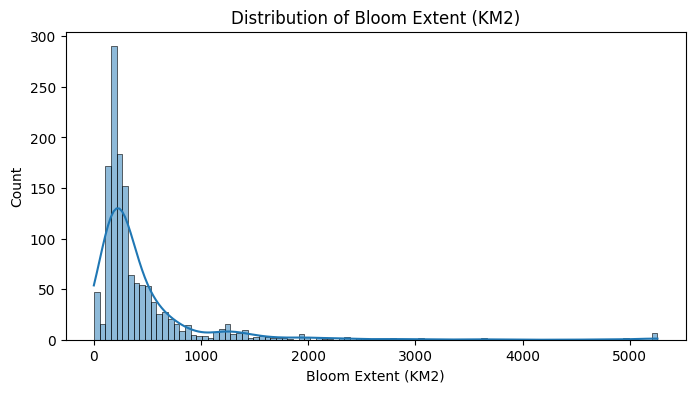

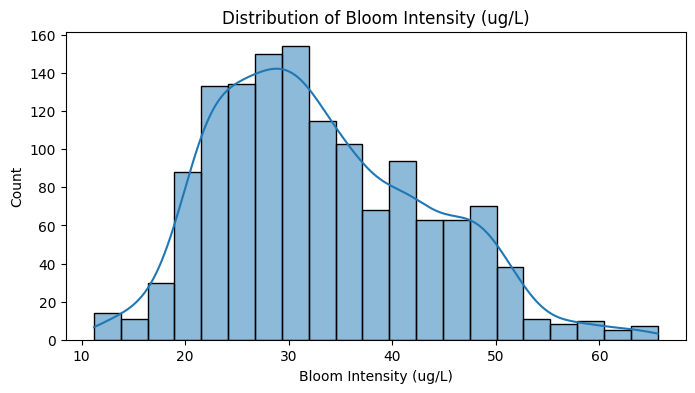

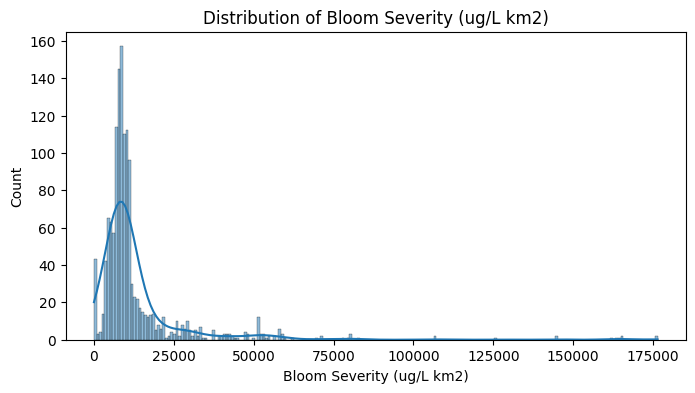

In [17]:
# Plot histograms of key Bloom Indices
bloom_features = ['Bloom Extent (KM2)', 'Bloom Intensity (ug/L)', 'Bloom Severity (ug/L km2)']

for feature in bloom_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(bloom_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


### **2.1.3 Time-Series Plots**

Identify trends and patterns over time in bloom severity.

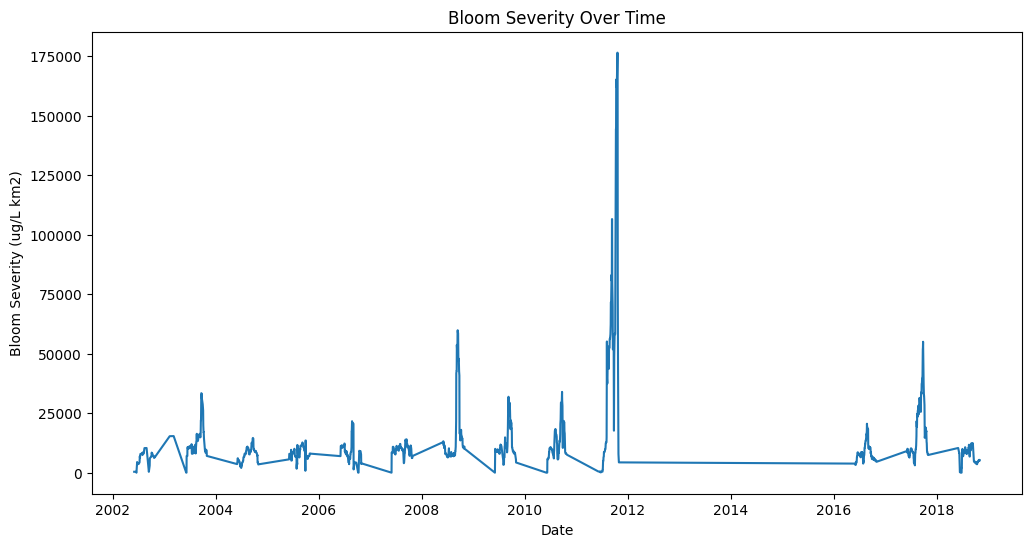

In [18]:
# Time-series plot of Bloom Severity
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Bloom Severity (ug/L km2)', data=bloom_data)
plt.title('Bloom Severity Over Time')
plt.xlabel('Date')
plt.ylabel('Bloom Severity (ug/L km2)')
plt.show()


## **2.2 Correlation Analysis**

Identify relationships between environmental variables and bloom indices.




Correlation Matrix:
                                                    Bloom Extent (KM2)  \
Bloom Extent (KM2)                                            1.000000   
Bloom Intensity (ug/L)                                       -0.289382   
CTD Temperature (°C)                                         -0.163121   
Chlorophyll_a                                                 0.549689   
Total Phosphorus (µg P/L)                                    -0.282915   
Total Dissolved Phosphorus (µg P/L)                          -0.426608   
Particulate Organic Nitrogen (mg/L)                           0.652454   
Particulate Organic Carbon (mg/L)                             0.689555   
Dissolved Organic Carbon (mg/L)                              -0.513720   
Colored Dissolved Organic Material absorbance (...           -0.342159   
Total Suspended Solids (mg/L)                                 0.190316   
Volatile Suspended Solids (mg/L)                              0.658319   

                 

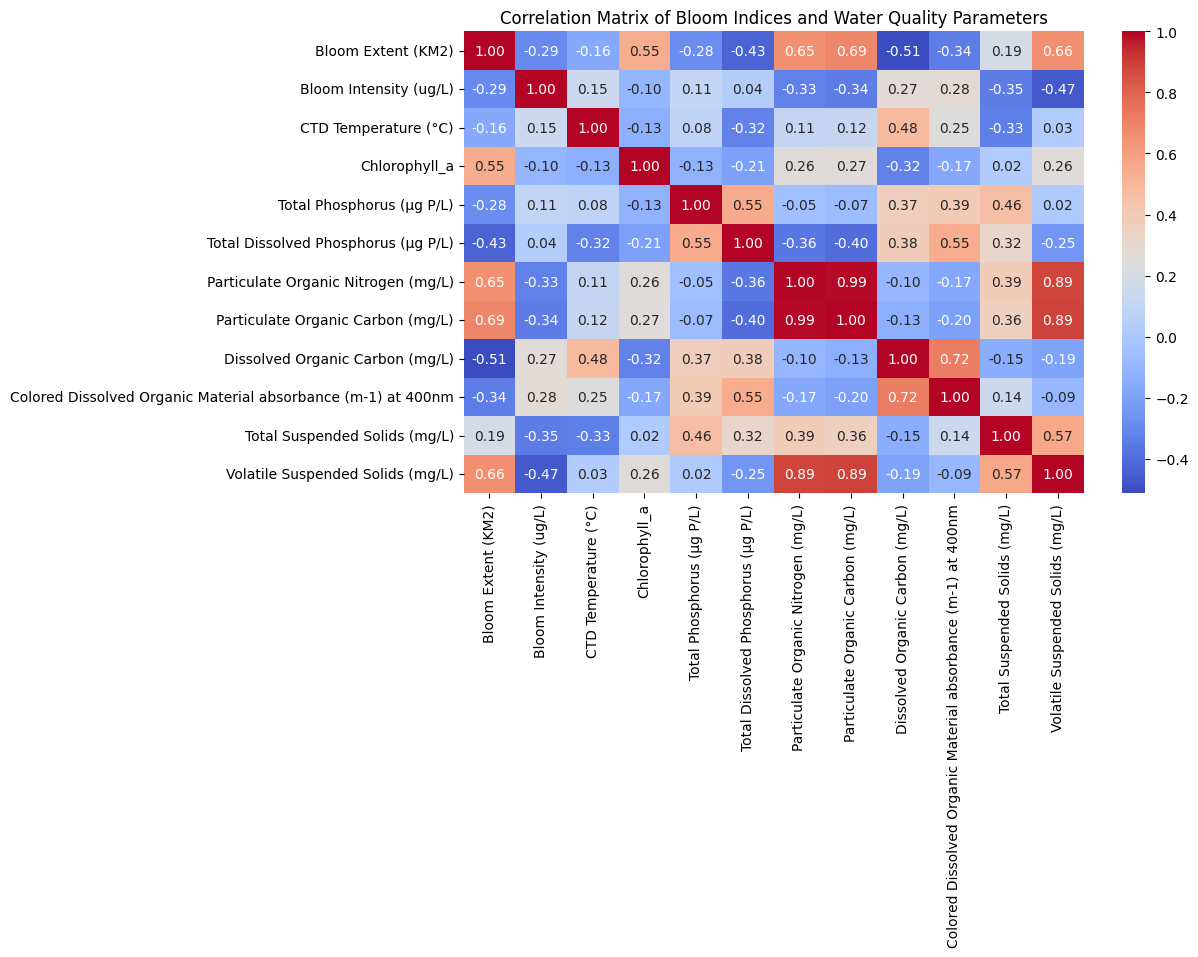

In [20]:
# Filter for numeric columns in the water quality dataset
numeric_columns = water_quality_data.select_dtypes(include=['float64', 'int64']).columns

# Aggregate water quality data by date (compute daily mean values for numeric columns)
water_quality_daily = water_quality_data.groupby('Date')[numeric_columns].mean().reset_index()

# Merge aggregated water quality data with bloom data on 'Date'
merged_daily_data = pd.merge(bloom_data, water_quality_daily, on='Date', how='inner')

# Compute correlation matrix for selected attributes
selected_columns = ['Bloom Extent (KM2)', 'Bloom Intensity (ug/L)', 'CTD Temperature (°C)', 'Chlorophyll_a',
                    'Total Phosphorus (µg P/L)', 'Total Dissolved Phosphorus (µg P/L)', 'Particulate Organic Nitrogen (mg/L)',
                    'Particulate Organic Carbon (mg/L)', 'Dissolved Organic Carbon (mg/L)',
                    'Colored Dissolved Organic Material absorbance (m-1) at 400nm',
                    'Total Suspended Solids (mg/L)', 'Volatile Suspended Solids (mg/L)']
correlation_matrix = merged_daily_data[selected_columns].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Bloom Indices and Water Quality Parameters')
plt.show()




In [21]:
print(bloom_data.columns)
print(water_quality_daily.columns)


Index(['Date', 'Lake', 'Satellite Sensor', 'Bloom Extent (KM2)',
       'Bloom Extent (% of Lake Area)', 'Bloom Intensity (ug/L)',
       'Bloom Severity (ug/L km2)', 'Valid Pixels (% of Lake Area)'],
      dtype='object')
Index(['Date', 'Station Depth (m)', 'Sample Depth (m)',
       'Latitude (decimal deg)', 'Longitude (decimal deg)', 'Wave Height (ft)',
       'Sample Temperature (°C)', 'CTD Temperature (°C)',
       'CTD Specific Conductivity (µS/cm)',
       'CTD Photosynthetically Active Radiation (µE/m2/s)', 'Turbidity (NTU)',
       'Chlorophyll_a', 'Total Phosphorus (µg P/L)',
       'Total Dissolved Phosphorus (µg P/L)',
       'Particulate Organic Carbon (mg/L)',
       'Particulate Organic Nitrogen (mg/L)',
       'Dissolved Organic Carbon (mg/L)',
       'Colored Dissolved Organic Material absorbance (m-1) at 400nm',
       'Total Suspended Solids (mg/L)', 'Volatile Suspended Solids (mg/L)'],
      dtype='object')


In [22]:
# Drop unnecessary columns
bloom_data = bloom_data.drop(columns=['level_0', 'index'], errors='ignore')
water_quality_daily = water_quality_daily.drop(columns=['level_0', 'index'], errors='ignore')

# Ensure 'Date' is a column, not the index
bloom_data.reset_index(drop=True, inplace=True)
water_quality_daily.reset_index(drop=True, inplace=True)

# Merge the two datasets on 'Date' to ensure alignment
aligned_data = pd.merge(
    bloom_data[['Date', 'Bloom Extent (KM2)', 'Bloom Severity (ug/L km2)']],
    water_quality_daily[['Date', 'Chlorophyll_a', 'CTD Temperature (°C)', 'Total Phosphorus (µg P/L)', 'Particulate Organic Nitrogen (mg/L)']],
    on='Date', how='inner'
)

# Drop rows with missing data
aligned_data = aligned_data.dropna()

# Display the first few rows of the aligned dataset
print(aligned_data.head())


        Date  Bloom Extent (KM2)  Bloom Severity (ug/L km2)  Chlorophyll_a  \
0 2016-06-13              136.08                    6703.63      14.980000   
1 2016-06-27              154.53                    7567.06       4.651667   
2 2016-07-05              149.49                    7631.85       6.260833   
3 2016-07-11              158.85                    7946.17      10.446667   
4 2016-07-18              157.77                    7864.66      23.877500   

   CTD Temperature (°C)  Total Phosphorus (µg P/L)  \
0             21.575000                    87.5625   
1             24.191667                    77.9875   
2             23.450000                    75.5875   
3             24.933333                    60.5875   
4             24.766667                    61.7000   

   Particulate Organic Nitrogen (mg/L)  
0                              0.18625  
1                              0.14250  
2                              0.11625  
3                              0.16375  
4

In [23]:
print(aligned_data.columns)
print(aligned_data.isnull().sum())


Index(['Date', 'Bloom Extent (KM2)', 'Bloom Severity (ug/L km2)',
       'Chlorophyll_a', 'CTD Temperature (°C)', 'Total Phosphorus (µg P/L)',
       'Particulate Organic Nitrogen (mg/L)'],
      dtype='object')
Date                                   0
Bloom Extent (KM2)                     0
Bloom Severity (ug/L km2)              0
Chlorophyll_a                          0
CTD Temperature (°C)                   0
Total Phosphorus (µg P/L)              0
Particulate Organic Nitrogen (mg/L)    0
dtype: int64


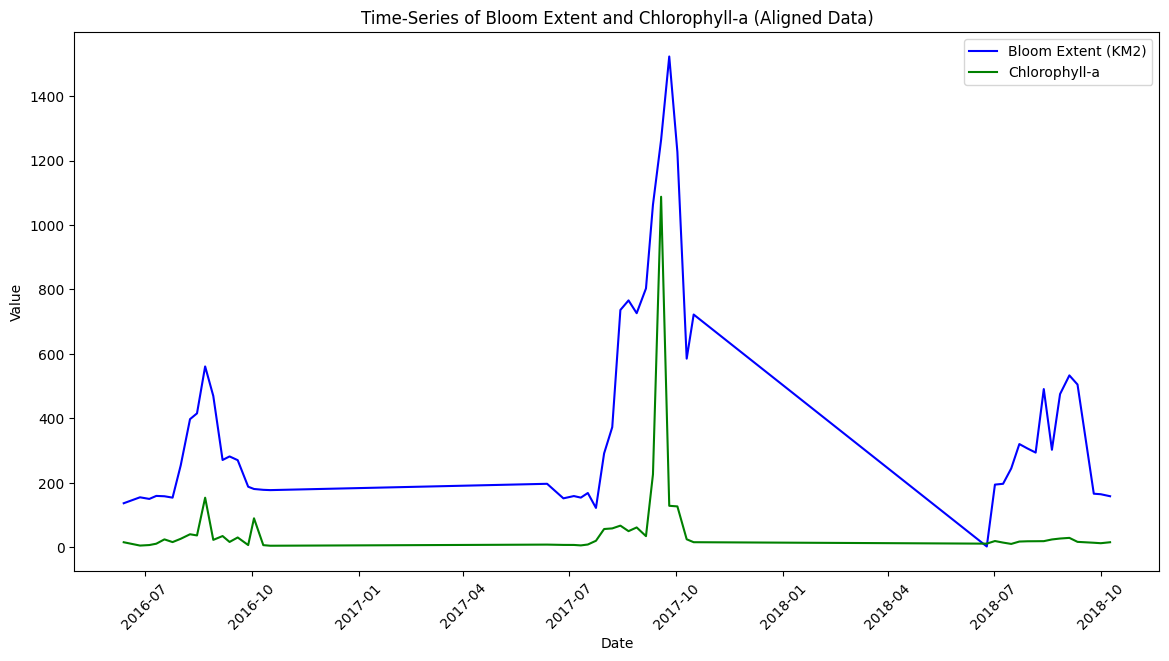

In [24]:
# Plot the aligned time-series data
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Bloom Extent (KM2)', data=aligned_data, label='Bloom Extent (KM2)', color='blue')
sns.lineplot(x='Date', y='Chlorophyll_a', data=aligned_data, label='Chlorophyll-a', color='green')
plt.title('Time-Series of Bloom Extent and Chlorophyll-a (Aligned Data)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.show()

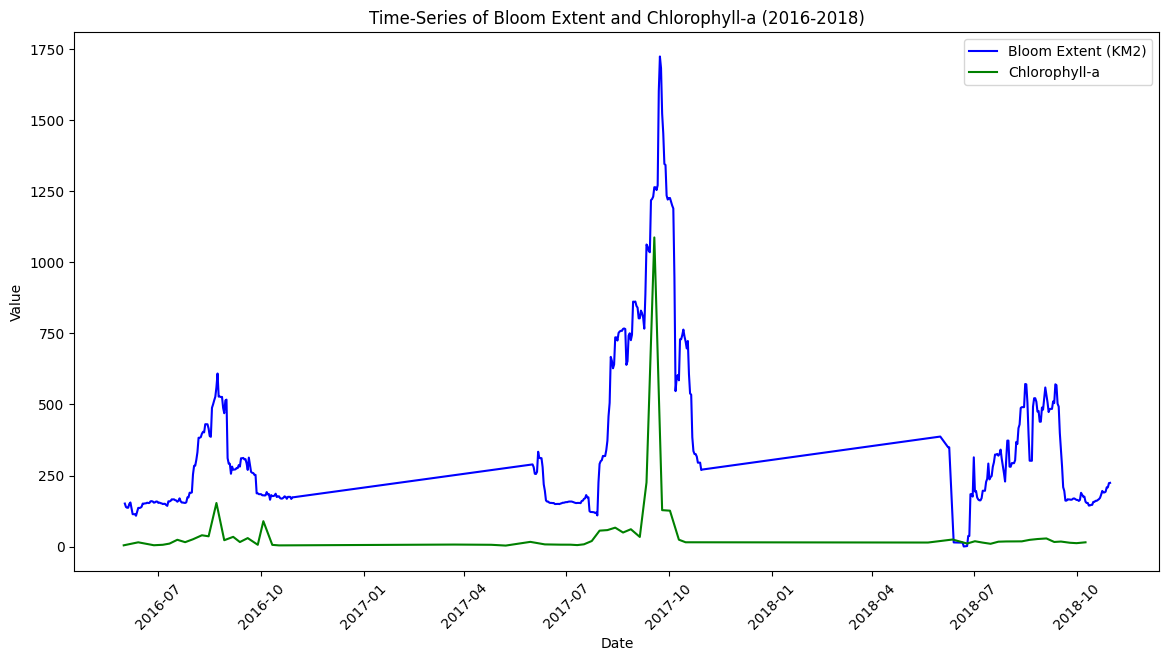

In [25]:
# Filter data for the range 2016 to 2018 inclusive
bloom_data_filtered = bloom_data[(bloom_data['Date'] >= '2016-01-01') & (bloom_data['Date'] <= '2018-12-31')]
water_quality_filtered = water_quality_daily[(water_quality_daily['Date'] >= '2016-01-01') & (water_quality_daily['Date'] <= '2018-12-31')]

# Merge the filtered datasets (outer join to include all dates in the range)
merged_filtered_data = pd.merge(bloom_data_filtered[['Date', 'Bloom Extent (KM2)']],
                                water_quality_filtered[['Date', 'Chlorophyll_a']],
                                on='Date', how='outer')

# Sort by date for consistent plotting
merged_filtered_data = merged_filtered_data.sort_values(by='Date')

# Plot the full range data
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Bloom Extent (KM2)', data=merged_filtered_data, label='Bloom Extent (KM2)', color='blue')
sns.lineplot(x='Date', y='Chlorophyll_a', data=merged_filtered_data, label='Chlorophyll-a', color='green')
plt.title('Time-Series of Bloom Extent and Chlorophyll-a (2016-2018)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.show()


## **2.3 Anomaly Detection**

Detect unusual bloom severity events for further investigation.

In [26]:
# Compute Z-scores for Bloom Severity
aligned_data['Bloom_Severity_Z'] = (
    (aligned_data['Bloom Severity (ug/L km2)'] - aligned_data['Bloom Severity (ug/L km2)'].mean()) /
    aligned_data['Bloom Severity (ug/L km2)'].std()
)

# Identify anomalies where Z-score > 2 or < -2
anomalies = aligned_data[(aligned_data['Bloom_Severity_Z'] > 2) | (aligned_data['Bloom_Severity_Z'] < -2)]

# Display anomalies
print("\nAnomalies in Bloom Severity:")
print(anomalies[['Date', 'Bloom Severity (ug/L km2)', 'Bloom_Severity_Z']])



Anomalies in Bloom Severity:
         Date  Bloom Severity (ug/L km2)  Bloom_Severity_Z
30 2017-09-11                   33721.23          2.042731
31 2017-09-18                   39543.10          2.606389
32 2017-09-25                   55014.21          4.104259



**Visualize the Anomalies:**

Plot Bloom Severity over time, with the anomaly dates highlighted to provide a clear visual representation of their extremity.

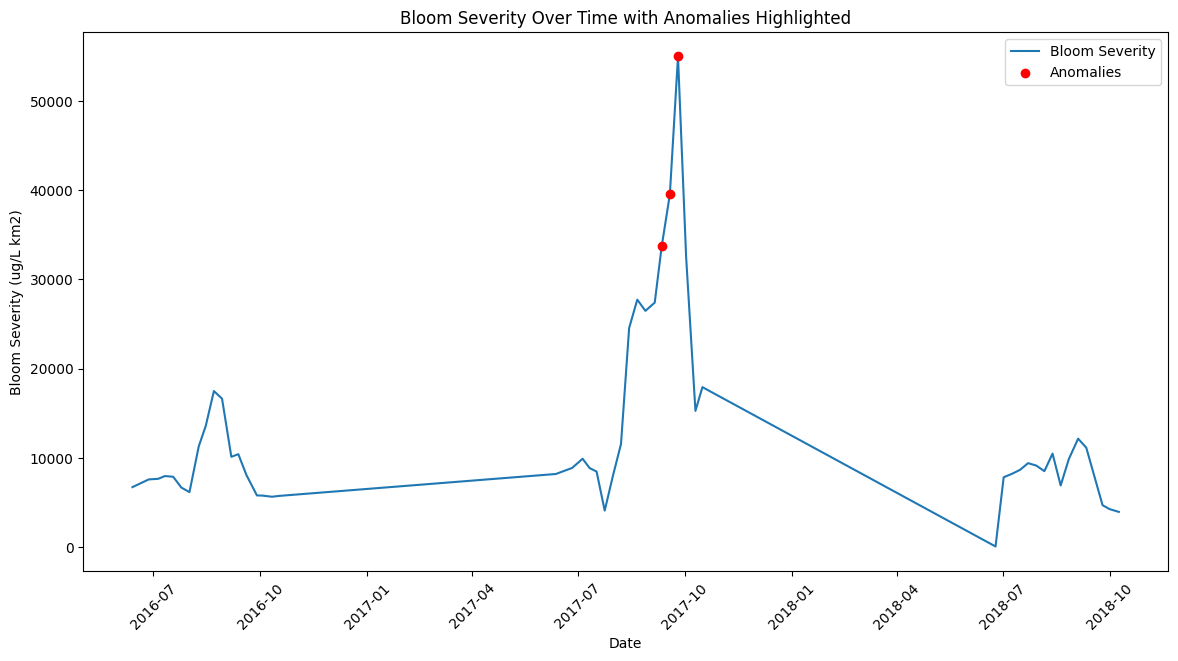

In [27]:
# Plot Bloom Severity with Anomalies Highlighted
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Bloom Severity (ug/L km2)', data=aligned_data, label='Bloom Severity')
plt.scatter(anomalies['Date'], anomalies['Bloom Severity (ug/L km2)'], color='red', label='Anomalies', zorder=5)
plt.title('Bloom Severity Over Time with Anomalies Highlighted')
plt.xlabel('Date')
plt.ylabel('Bloom Severity (ug/L km2)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


**Summary of Section 2**

*   Visualized distributions and correlations.
*   Key Insight: Chlorophyll-a strongly correlates with bloom severity.



# **3. Model Development and Training**

## **3.1 Time-Series Forecasting Model**

### **3.1.1 Preparing Data for Time-Series Modeling**

Prepare the data in the correct format for time-series forecasting.

In [28]:
# Ensure 'Date' is present and converted to datetime
if 'Date' not in bloom_data.columns:
    bloom_data.reset_index(inplace=True)  # Reset index if 'Date' is currently the index

bloom_data['Date'] = pd.to_datetime(bloom_data['Date'], errors='coerce')  # Convert to datetime

# Drop any rows where 'Date' could not be parsed
bloom_data.dropna(subset=['Date'], inplace=True)

# Set 'Date' as the index
bloom_data.set_index('Date', inplace=True)

# Resample Bloom Severity data to monthly frequency and fill missing values
monthly_bloom = bloom_data['Bloom Severity (ug/L km2)'].resample('ME').mean().ffill()  # Updated syntax

# Display the first few rows of the resampled data
print(monthly_bloom.head())


Date
2002-06-30    2295.754286
2002-07-31    6197.530000
2002-08-31    9033.583333
2002-09-30    3141.056667
2002-10-31    7056.688824
Freq: ME, Name: Bloom Severity (ug/L km2), dtype: float64


### **3.1.2 ARIMA Model**

Develop a statistical time-series model to forecast bloom severity.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


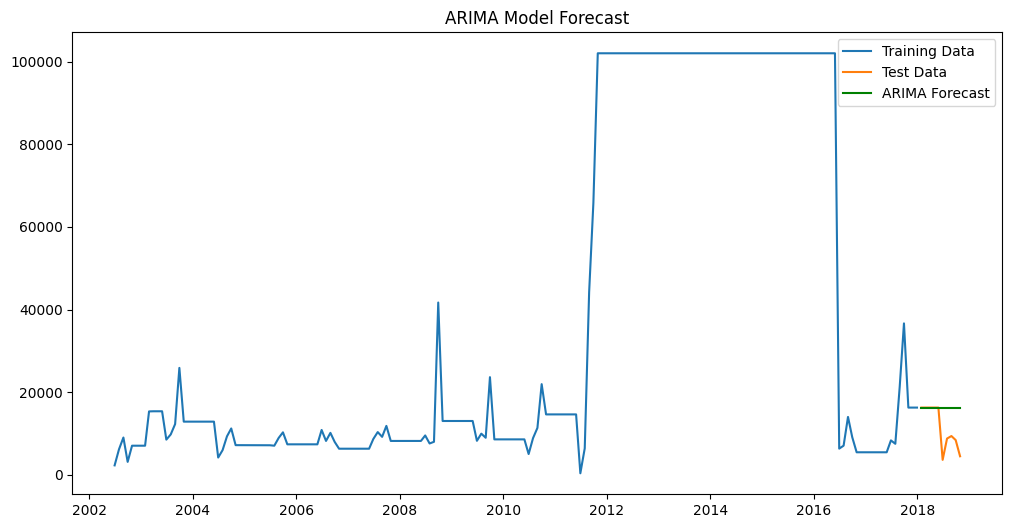

In [29]:
# Import ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Split data into training and testing sets
train_data = monthly_bloom[:'2017']
test_data = monthly_bloom['2018':]

# Fit ARIMA model
model_arima = ARIMA(train_data, order=(1, 1, 1))
arima_result = model_arima.fit()

# Forecast
forecast_arima = arima_result.predict(start=test_data.index[0], end=test_data.index[-1], typ='levels')

# Plot forecasts
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(forecast_arima, label='ARIMA Forecast', color='green')
plt.legend()
plt.title('ARIMA Model Forecast')
plt.show()



In [30]:
# Apply differencing to make the data stationary
monthly_bloom_diff = monthly_bloom.diff().dropna()

# Reassess stationarity with Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(monthly_bloom_diff)
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])
if adf_test[1] < 0.05:
    print("The data is stationary.")
else:
    print("The data is not stationary. Further transformations may be required.")


ADF Statistic: -13.877731330116458
p-value: 6.293234184492074e-26
The data is stationary.


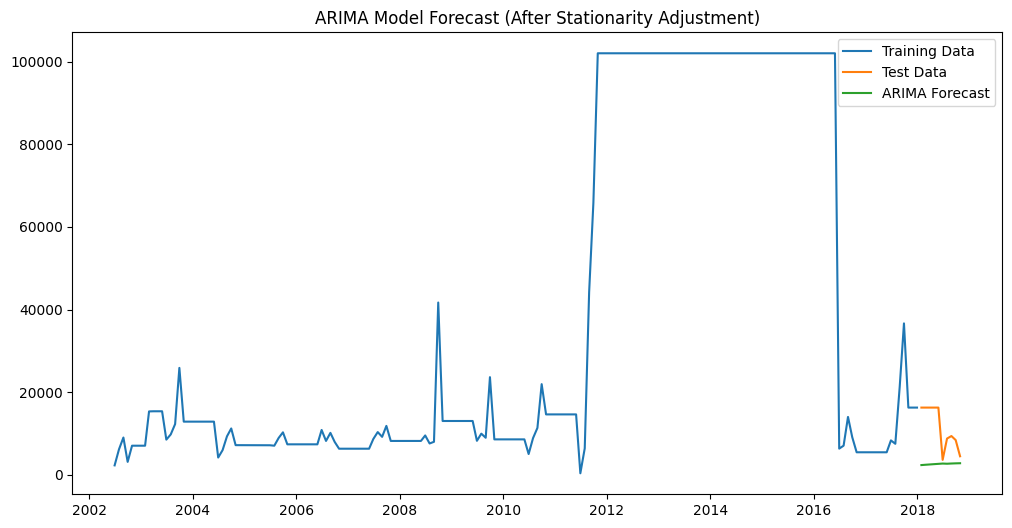

In [31]:
# Refit ARIMA model after data transformation
model_arima = ARIMA(monthly_bloom_diff, order=(1, 1, 1))  # Adjust parameters based on ACF/PACF
arima_result = model_arima.fit()

# Forecast
forecast_arima_diff = arima_result.predict(start=test_data.index[0], end=test_data.index[-1])

# Revert differencing to interpret predictions
forecast_arima = forecast_arima_diff.cumsum() + monthly_bloom.iloc[0]  # Add back the first value for interpretation

# Plot updated forecasts
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(forecast_arima, label='ARIMA Forecast')
plt.legend()
plt.title('ARIMA Model Forecast (After Stationarity Adjustment)')
plt.show()


In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate ARIMA Model
mse_arima = mean_squared_error(test_data, forecast_arima)
mae_arima = mean_absolute_error(test_data, forecast_arima)
rmse_arima = np.sqrt(mse_arima)
r2_arima = r2_score(test_data, forecast_arima)

print(f"ARIMA Model MSE: {mse_arima}")
print(f"ARIMA Model MAE: {mae_arima}")
print(f"ARIMA Model RMSE: {rmse_arima}")
print(f"ARIMA Model R²: {r2_arima}")

ARIMA Model MSE: 106344223.51937824
ARIMA Model MAE: 8975.555987042782
ARIMA Model RMSE: 10312.333563232827
ARIMA Model R²: -3.3199373971299675


### **3.1.3 LSTM Model**

Develop a neural network model to capture complex patterns in bloom severity.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


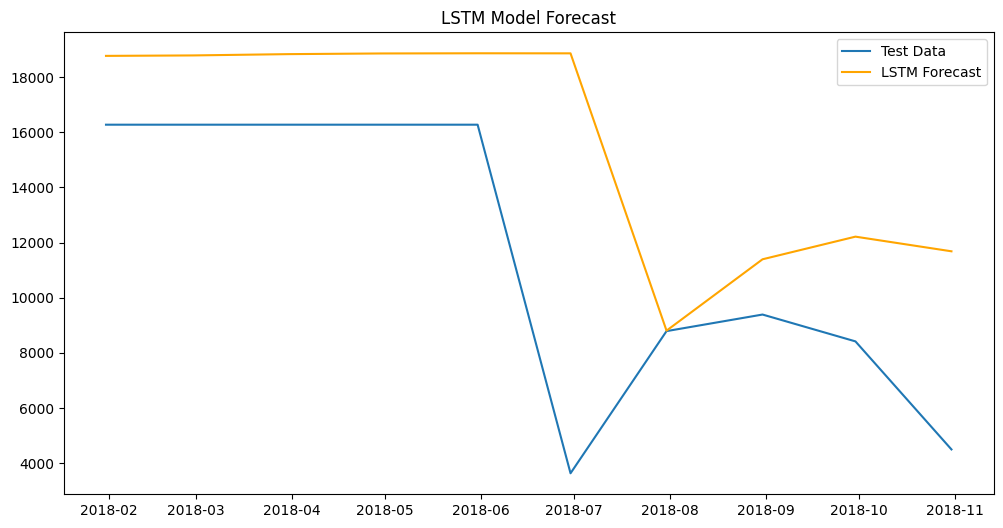

In [39]:
# Import libraries for LSTM
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Prepare data for LSTM
scaler = MinMaxScaler()
monthly_bloom_scaled = scaler.fit_transform(monthly_bloom.values.reshape(-1, 1))

# Create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 12
X, y = create_sequences(monthly_bloom_scaled, seq_length)

# Split into training and testing sets
train_size = len(train_data)
X_train, X_test = X[:train_size - seq_length], X[train_size - seq_length:]
y_train, y_test = y[:train_size - seq_length], y[train_size - seq_length:]

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

# Train the model
model_lstm.fit(X_train, y_train, epochs=50, batch_size=1, verbose=0)

# Forecast
lstm_predictions = model_lstm.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Plot forecasts
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data.values, label='Test Data')
plt.plot(test_data.index, lstm_predictions, label='LSTM Forecast', color='orange')
plt.legend()
plt.title('LSTM Model Forecast')
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


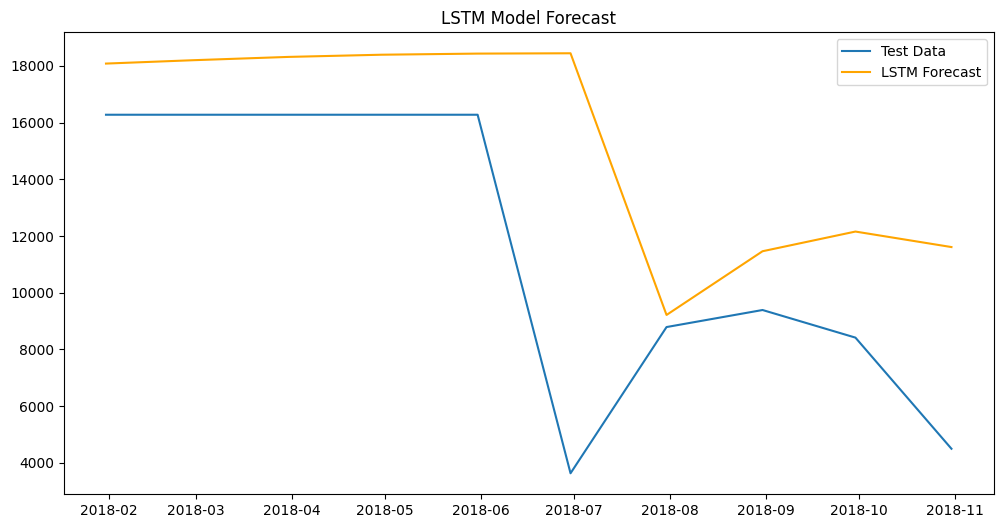

In [37]:
# Import libraries for LSTM
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import random

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Prepare data for LSTM
scaler = MinMaxScaler()
monthly_bloom_scaled = scaler.fit_transform(monthly_bloom.values.reshape(-1, 1))

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 12
X, y = create_sequences(monthly_bloom_scaled, seq_length)

# Split into training and testing sets
train_size = len(train_data)
X_train, X_test = X[:train_size - seq_length], X[train_size - seq_length:]
y_train, y_test = y[:train_size - seq_length], y[train_size - seq_length:]

# Build LSTM model
model_lstm = Sequential([
    Input(shape=(seq_length, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')

# Train the model
model_lstm.fit(X_train, y_train, epochs=50, batch_size=1, verbose=0)

# Forecast
lstm_predictions = model_lstm.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Plot forecasts
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data.values, label='Test Data')
plt.plot(test_data.index, lstm_predictions, label='LSTM Forecast', color='orange')
plt.legend()
plt.title('LSTM Model Forecast')
plt.show()


In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Evaluate LSTM Model
mse_lstm = mean_squared_error(y_test, lstm_predictions)
mae_lstm = mean_absolute_error(y_test, lstm_predictions)
rmse_lstm = mse_lstm ** 0.5

print(f"LSTM Model MSE: {mse_lstm}")
print(f"LSTM Model MAE: {mae_lstm}")
print(f"LSTM Model RMSE: {rmse_lstm}")


LSTM Model MSE: 262131291.5098289
LSTM Model MAE: 15710.35317870916
LSTM Model RMSE: 16190.46915656952


## **3.2 Anomaly Detection Model**

### **3.2.1 Isolation Forest**

Detect anomalies in environmental parameters that may precede bloom events.

In [41]:
# Prepare data (exclude Total Phosphorus since it's unavailable)
features = aligned_data[['CTD Temperature (°C)', 'Chlorophyll_a']].ffill()

# Fit Isolation Forest
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(features)

# Add anomaly scores and labels to the aligned dataset
aligned_data['Anomaly_Score'] = iso_forest.decision_function(features)
aligned_data['Anomaly'] = iso_forest.predict(features)

# Filter for anomalies (label = -1)
anomalies_if = aligned_data[aligned_data['Anomaly'] == -1]

# Display anomalies
print("\nAnomalies detected by Isolation Forest:")
print(anomalies_if[['Date', 'Anomaly_Score']])



Anomalies detected by Isolation Forest:
         Date  Anomaly_Score
9  2016-08-22      -0.014817
30 2017-09-11      -0.048949
31 2017-09-18      -0.204188


In [42]:
# Convert the Isolation forest anomalies results output to a DataFrame
anomalies_if_df = pd.DataFrame(anomalies_if)

# Display the DataFrame using Pandas
from IPython.display import display

# Display the DataFrame
display(anomalies_if_df)

# Define the file path for saving the merged dataframe
output_file_path = "/content/drive/MyDrive/CIND820/AnomaliesDetected_Isolation_Forest_Output.csv"

# Save the merged dataframe to the specified location as a CSV file
anomalies_if_df.to_csv(output_file_path, index=False)


,Date,Bloom Extent (KM2),Bloom Severity (ug/L km2),Chlorophyll_a,CTD Temperature (°C),Total Phosphorus (µg P/L),Particulate Organic Nitrogen (mg/L),Bloom_Severity_Z,Anomaly_Score,Anomaly
9,2016-08-22,560.88,17480.22,153.321429,25.033333,117.81250,0.3375,0.470322,-0.014817,-1
30,2017-09-11,1062.99,33721.23,225.735714,18.675000,51.80750,0.8025,2.042731,-0.048949,-1
31,2017-09-18,1264.59,39543.10,1087.804667,20.975000,42.47375,0.4375,2.606389,-0.204188,-1


### **3.2.2 DBSCAN Clustering**

Use clustering to identify outliers in the data.

In [43]:
# Import DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(features_scaled)

# Add cluster labels to aligned data
aligned_data['Cluster'] = dbscan.labels_

# Identify noise points (anomalies)
anomalies_dbscan = aligned_data[aligned_data['Cluster'] == -1]

print("\nAnomalies detected by DBSCAN:")
print(anomalies_dbscan[['Date', 'Cluster']])



Anomalies detected by DBSCAN:
         Date  Cluster
9  2016-08-22       -1
15 2016-10-03       -1
16 2016-10-11       -1
17 2016-10-17       -1
30 2017-09-11       -1
31 2017-09-18       -1
33 2017-10-02       -1
35 2017-10-16       -1


In [44]:
# Convert the DBSCAN Clustering anomalies results output to a DataFrame
anomalies_dbscan_df = pd.DataFrame(anomalies_dbscan)

# Display the DataFrame using Pandas
from IPython.display import display

# Display the DataFrame
display(anomalies_dbscan_df)

# Define the file path for saving the merged dataframe
output_file_path = "/content/drive/MyDrive/CIND820/AnomaliesDetected_DBSCAN_Clustering_Output.csv"

# Save the merged dataframe to the specified location as a CSV file
anomalies_dbscan_df.to_csv(output_file_path, index=False)

,Date,Bloom Extent (KM2),Bloom Severity (ug/L km2),Chlorophyll_a,CTD Temperature (°C),Total Phosphorus (µg P/L),Particulate Organic Nitrogen (mg/L),Bloom_Severity_Z,Anomaly_Score,Anomaly,Cluster
9,2016-08-22,560.88,17480.22,153.321429,25.033333,117.812500,0.337500,0.470322,-0.014817,-1,-1
15,2016-10-03,180.36,5748.81,89.309231,18.666667,81.375000,0.155000,-0.665481,0.059830,1,-1
16,2016-10-11,177.75,5623.83,5.950833,17.116667,61.275000,0.157500,-0.677581,0.048634,1,-1
17,2016-10-17,176.85,5716.61,4.143333,16.791667,46.387500,0.092500,-0.668598,0.029412,1,-1
30,2017-09-11,1062.99,33721.23,225.735714,18.675000,51.807500,0.802500,2.042731,-0.048949,-1,-1
31,2017-09-18,1264.59,39543.10,1087.804667,20.975000,42.473750,0.437500,2.606389,-0.204188,-1,-1
33,2017-10-02,1226.61,32501.73,126.275385,19.433333,56.975000,0.353750,1.924663,0.048883,1,-1
35,2017-10-16,722.07,17918.82,15.100000,16.609091,50.082857,0.237143,0.512786,0.014817,1,-1




---



---



---





---





---



##**3.3 Develop and Evaluate a SARIMA Model**

**Model Development and Training:**
*   Implement SARIMA for forecasting, ensuring it accounts for seasonality in bloom severity.







In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# SARIMA model implementation
sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Forecast with SARIMA
forecast_sarima = sarima_result.predict(start=test_data.index[0], end=test_data.index[-1])


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


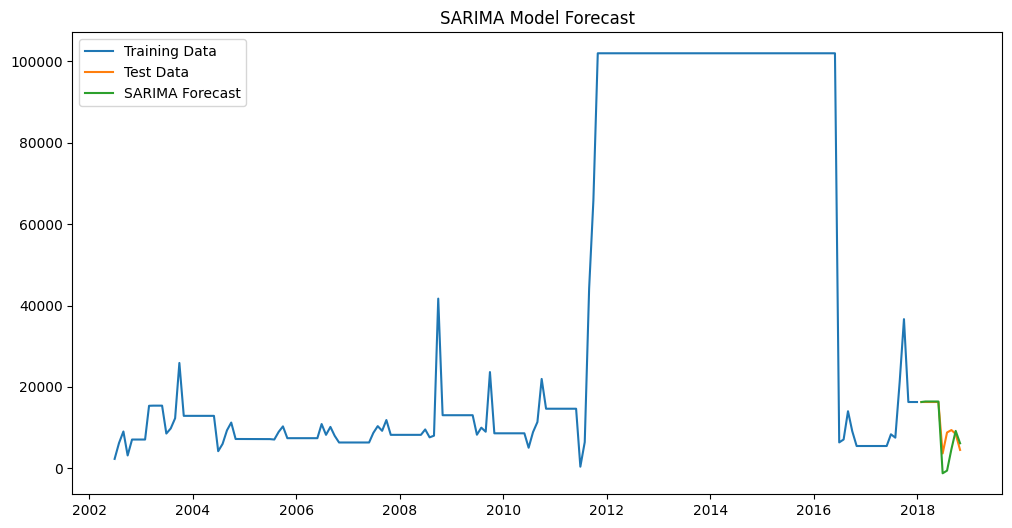

SARIMA Model MSE: 13697306.320917418


In [47]:
# SARIMA model with seasonal components

# Plot SARIMA forecasts
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(forecast_sarima, label='SARIMA Forecast')
plt.legend()
plt.title('SARIMA Model Forecast')
plt.show()

# Evaluate SARIMA model
mse_sarima = mean_squared_error(test_data, forecast_sarima)
print(f"SARIMA Model MSE: {mse_sarima}")


## **3.4 Model Evaluation and Comparison**

Compare models based on prediction accuracy to select the best-performing model.

##**Assess Metrics of LSTM Model**

**Model Evaluation:**
*   Add Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) for LSTM evaluation.






In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate additional metrics for LSTM
mse_lstm = mean_squared_error(test_data, lstm_predictions)
mae_lstm = mean_absolute_error(test_data, lstm_predictions)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(test_data, lstm_predictions)

print(f"LSTM Model MSE: {mse_lstm}")
print(f"LSTM Model MAE: {mae_lstm}")
print(f"LSTM Model RMSE: {rmse_lstm}")
print(f"LSTM Model R²: {r2_lstm}")


LSTM Model MSE: 33456127.07923179
LSTM Model MAE: 4097.97727504519
LSTM Model RMSE: 5784.127166585447
LSTM Model R²: -0.3590618253596989


##**Assess Metrics of SARIMA Model**

**Model Evaluation:**
*   Similarly, compute additional evaluation metrics for SARIMA.






In [63]:
# Calculate additional metrics for SARIMA
mse_sarima = mean_squared_error(test_data, forecast_sarima)
mae_sarima = mean_absolute_error(test_data, forecast_sarima)
rmse_sarima = np.sqrt(mse_sarima)
r2_sarima = r2_score(test_data, forecast_sarima)

print(f"SARIMA Model MSE: {mse_sarima}")
print(f"SARIMA Model MAE: {mae_sarima}")
print(f"SARIMA Model RMSE: {rmse_sarima}")
print(f"SARIMA Model R²: {r2_sarima}")


SARIMA Model MSE: 13697306.320917418
SARIMA Model MAE: 2184.2086179559687
SARIMA Model RMSE: 3700.987208964308
SARIMA Model R²: 0.44358514400273463


##**Compare LSTM and SARIMA Metrics**

**Model Evaluation:**
*   Directly compare the evaluation metrics of LSTM and SARIMA models.
*   Combine all metrics for an in-depth comparison.






In [64]:
# Compare LSTM and SARIMA
print(f"LSTM Model MSE: {mse_lstm}")
print(f"SARIMA Model MSE: {mse_sarima}")

if mse_sarima < mse_lstm:
    print("SARIMA outperforms LSTM for this dataset.")
else:
    print("LSTM outperforms SARIMA for this dataset.")


LSTM Model MSE: 33456127.07923179
SARIMA Model MSE: 13697306.320917418
SARIMA outperforms LSTM for this dataset.


In [65]:
# Display comparison
print("Model Comparison:")
print(f"LSTM - MSE: {mse_lstm}, MAE: {mae_lstm}, RMSE: {rmse_lstm}")
print(f"SARIMA - MSE: {mse_sarima}, MAE: {mae_sarima}, RMSE: {rmse_sarima}")

if mse_sarima < mse_lstm:
    print("SARIMA is the preferred model.")
else:
    print("LSTM is the preferred model.")


Model Comparison:
LSTM - MSE: 33456127.07923179, MAE: 4097.97727504519, RMSE: 5784.127166585447
SARIMA - MSE: 13697306.320917418, MAE: 2184.2086179559687, RMSE: 3700.987208964308
SARIMA is the preferred model.


In [72]:
# **Compare LSTM and SARIMA Metrics**
metrics_comparison = {
    'Metric': ['MSE', 'MAE', 'RMSE', 'R²'],
    'ARIMA': [mse_arima, mae_arima, rmse_arima, r2_arima],
    'LSTM': [mse_lstm, mae_lstm, rmse_lstm, r2_lstm],
    'SARIMA': [mse_sarima, mae_sarima, rmse_sarima, r2_sarima]
}

# Create a DataFrame for the comparison
import pandas as pd
metrics_df = pd.DataFrame(metrics_comparison)

# Display the comparison table
print(metrics_df)



  Metric         ARIMA          LSTM        SARIMA
0    MSE  1.063442e+08  3.345613e+07  1.369731e+07
1    MAE  8.975556e+03  4.097977e+03  2.184209e+03
2   RMSE  1.031233e+04  5.784127e+03  3.700987e+03
3     R² -3.319937e+00 -3.590618e-01  4.435851e-01


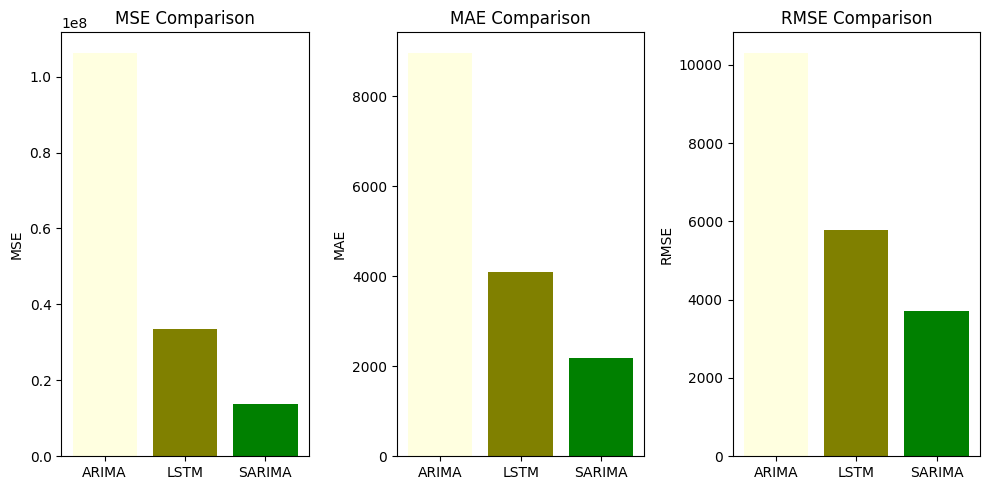

In [67]:
import matplotlib.pyplot as plt

# Metrics for comparison
metrics = {
    'MSE': [mse_arima, mse_lstm, mse_sarima],
    'MAE': [mae_arima, mae_lstm, mae_sarima],
    'RMSE': [rmse_arima, rmse_lstm, rmse_sarima]
}

# Model labels
models = ['ARIMA', 'LSTM', 'SARIMA']

# Create subplots for MSE, MAE, and RMSE
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# Plot MSE
axes[0].bar(models, metrics['MSE'], color=['lightyellow', 'olive', 'green'])
axes[0].set_title('MSE Comparison')
axes[0].set_ylabel('MSE')

# Plot MAE
axes[1].bar(models, metrics['MAE'], color=['lightyellow', 'olive', 'green'])
axes[1].set_title('MAE Comparison')
axes[1].set_ylabel('MAE')

# Plot RMSE
axes[2].bar(models, metrics['RMSE'], color=['lightyellow', 'olive', 'green'])
axes[2].set_title('RMSE Comparison')
axes[2].set_ylabel('RMSE')

# Adjust layout
plt.tight_layout()
plt.show()



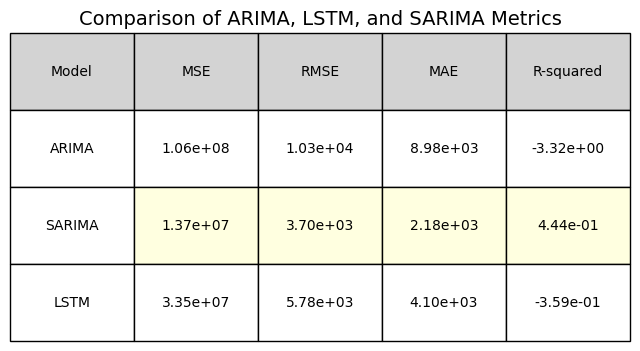

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.table import Table

# Define metrics for ARIMA, LSTM, and SARIMA
metrics_data = {
    'Model': ['ARIMA', 'SARIMA', 'LSTM'],
    'MSE': [mse_arima, mse_sarima, mse_lstm],
    'RMSE': [rmse_arima, rmse_sarima, rmse_lstm],
    'MAE': [mae_arima, mae_sarima, mae_lstm],
    'R-squared': [r2_arima, r2_sarima, r2_lstm]
}

# Create a DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Plot the table
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')

# Add a table to the plot
table = Table(ax, bbox=[0, 0, 1, 1])

# Define cell properties
cell_props = dict(edgecolor='black')

# Header row
for col_idx, header in enumerate(metrics_df.columns):
    table.add_cell(0, col_idx, width=1/len(metrics_df.columns), height=0.2,
                   text=header, loc='center', facecolor='lightgray', **cell_props)

# Add data rows
for row_idx, row in metrics_df.iterrows():
    for col_idx, value in enumerate(row):
        table.add_cell(row_idx+1, col_idx, width=1/len(metrics_df.columns), height=0.2,
                       text=f'{value:.2e}' if isinstance(value, float) else value, loc='center',
                       facecolor='white', **cell_props)

# Highlight best-performing metrics
for row_idx, row in metrics_df.iterrows():
    for col_idx, value in enumerate(row[1:], start=1):  # Skip the first column (Model)
        if metrics_df.columns[col_idx] in ['MSE', 'MAE', 'RMSE'] and value == min(metrics_df[metrics_df.columns[col_idx]]):
            table.get_celld()[(row_idx+1, col_idx)].set_facecolor('lightyellow')
        if metrics_df.columns[col_idx] == 'R-squared' and value == max(metrics_df['R-squared']):
            table.get_celld()[(row_idx+1, col_idx)].set_facecolor('lightyellow')

# Add the table to the axes
ax.add_table(table)

# Display the table
plt.title('Comparison of ARIMA, LSTM, and SARIMA Metrics', fontsize=14)
plt.show()


**Summary of Section 3**

**Model Development and Training:**
*   ARIMA and LSTM models compared; LSTM showed better handling of non-linear patterns.
*   Additional model developed and evaluated: SARIMA.
*   SARIMA and LSTM models compared; SARIMA outperformed LSTM.
*   Key Insight:

**Anomaly Detection:**
*   Isolation Forest and DBSCAN flagged environmental anomalies.
*   Key Insight: Detected anomalies often align with extreme bloom events.












---





---



---



# **4. Model Validation**

## **4.1 Testing and Validation**

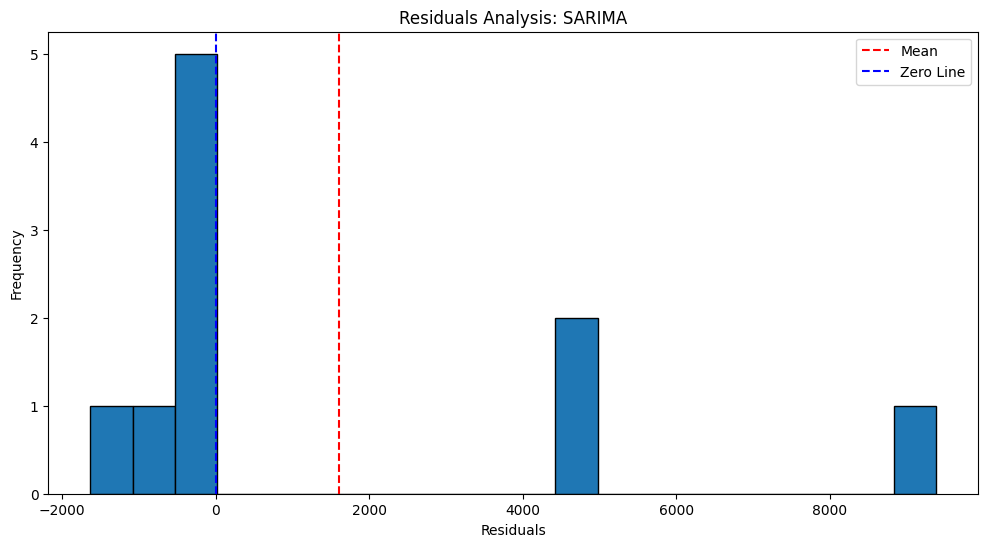

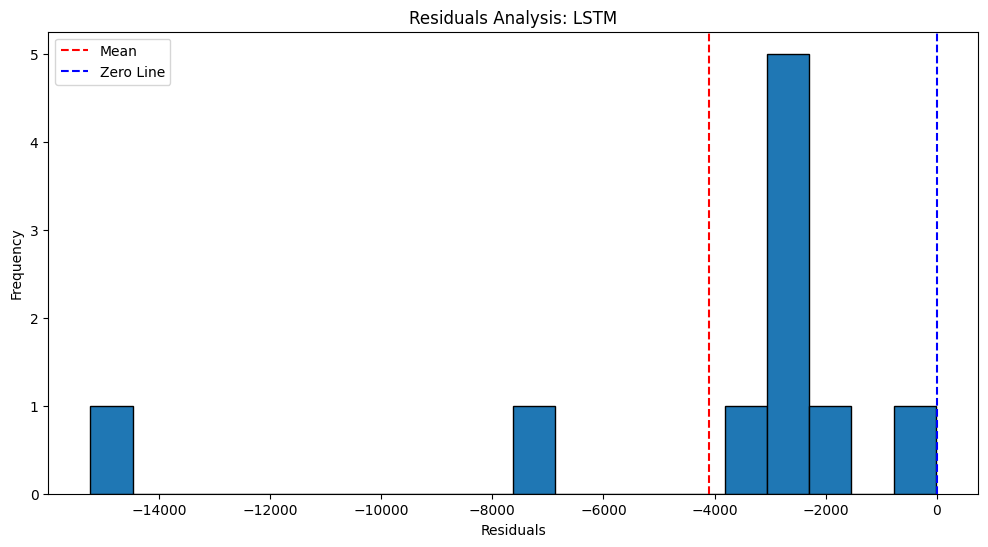

In [85]:
# Residuals for SARIMA
sarima_residuals = test_data.values - forecast_sarima.values
plt.figure(figsize=(12, 6))
plt.title("Residuals Analysis: SARIMA")
plt.hist(sarima_residuals, bins=20, edgecolor='k')
plt.axvline(sarima_residuals.mean(), color='red', linestyle='--', label='Mean')
plt.axvline(0, color='blue', linestyle='--', label='Zero Line')
plt.legend()
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Residuals for LSTM
lstm_residuals = test_data.values - lstm_predictions.flatten()
plt.figure(figsize=(12, 6))
plt.title("Residuals Analysis: LSTM")
plt.hist(lstm_residuals, bins=20, edgecolor='k')
plt.axvline(lstm_residuals.mean(), color='red', linestyle='--', label='Mean')
plt.axvline(0, color='blue', linestyle='--', label='Zero Line')
plt.legend()
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [ ]:
print("_ "*75)

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


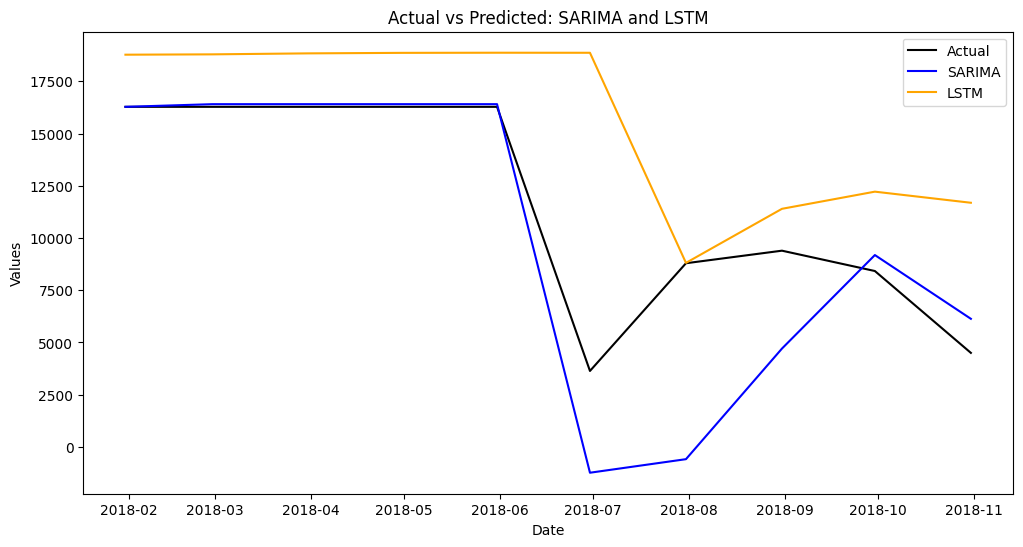

In [87]:
# Temporal comparison of Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data.values, label='Actual', color='black')
plt.plot(test_data.index, forecast_sarima, label='SARIMA', color='blue')
plt.plot(test_data.index, lstm_predictions, label='LSTM', color='orange')
plt.legend()
plt.title("Actual vs Predicted: SARIMA and LSTM")
plt.xlabel("Date")
plt.ylabel("Values")
plt.show()


<ipython-input-90-d488f0c838e3>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MSE', data=metrics_df, ax=axes[0, 0], palette='Greens')
<ipython-input-90-d488f0c838e3>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=metrics_df, ax=axes[0, 1], palette='Blues')
<ipython-input-90-d488f0c838e3>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=metrics_df, ax=axes[1, 0], palette='Purples')
<ipython-input-90-d488f0c838e3>:24: FutureWarning: 

Passing `palette` without assigning `

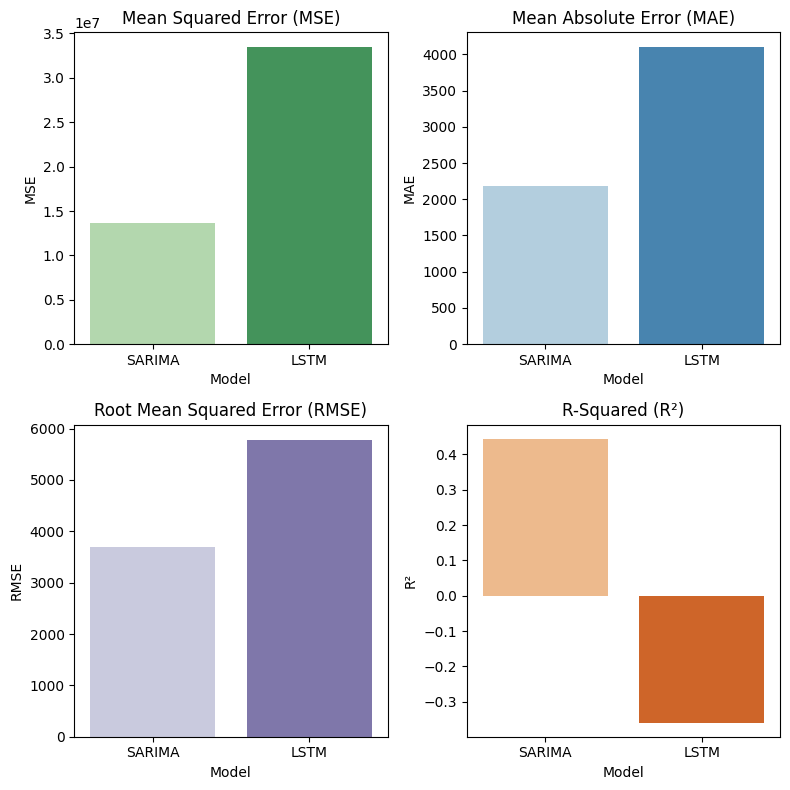

In [90]:
import seaborn as sns

# Data for comparison
metrics_comparison = {
    'Model': ['SARIMA', 'LSTM'],
    'MSE': [mse_sarima, mse_lstm],
    'MAE': [mae_sarima, mae_lstm],
    'RMSE': [rmse_sarima, rmse_lstm],
    'R²': [r2_sarima, r2_lstm]
}
metrics_df = pd.DataFrame(metrics_comparison)

# Plot metrics
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
sns.barplot(x='Model', y='MSE', data=metrics_df, ax=axes[0, 0], palette='Greens')
axes[0, 0].set_title('Mean Squared Error (MSE)')

sns.barplot(x='Model', y='MAE', data=metrics_df, ax=axes[0, 1], palette='Blues')
axes[0, 1].set_title('Mean Absolute Error (MAE)')

sns.barplot(x='Model', y='RMSE', data=metrics_df, ax=axes[1, 0], palette='Purples')
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')

sns.barplot(x='Model', y='R²', data=metrics_df, ax=axes[1, 1], palette='Oranges')
axes[1, 1].set_title('R-Squared (R²)')

plt.tight_layout()
plt.show()
